NLP to determine wheter the news is fake or real

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.fillna(' ', inplace=True)

In [8]:
df['content']=df['author'] + ' ' + df['title']

In [9]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


STEMMING
Stemming is the process of reducing a word to its root


In [10]:
port_stem=PorterStemmer()

def stemming(content):
    
    review = re.sub('[^a-zA-Z]',' ', content)
    review = review.lower()
    review = review.split()

    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review


In [11]:

df['content']=df['content'].apply(stemming)

In [12]:
x=df.drop(columns='label', axis=1)
y=df['label']
print(x.shape)
print(y.shape)
print(y.value_counts())
print(x.head())

(20800, 5)
(20800,)
label
1    10413
0    10387
Name: count, dtype: int64
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  Ever get the feeling your life circles the rou...   
2  Why the Truth Might Get You Fired October 29, ...   
3  Videos 15 Civilians Killed In Single US Airstr...   
4  Print \nAn Iranian woman has been sentenced to...   

                                             content  
0  darrel lucu hous dem aid even see comey letter... 

In [20]:
x=df['content'].values
y=df['label'].values
print(x)
print(y)
print(x.shape)
print(y.shape)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]
(20800,)
(20800,)


In [25]:
#TF-IDF stands for “Term Frequency – Inverse Document Frequency ”

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# converting the textual data to numerical data
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)

In [26]:
print(f"X shape: {tfidf.shape}")

X shape: (20800, 137225)


In [28]:
x_train, x_test, y_train, y_test=train_test_split(tfidf, y, test_size=0.2, random_state=40)

Training and comparing two different models: logistic regression and SVM

In [29]:
def train ( model, model_name):
    model.fit(x_train, y_train)
    print(f"training accuracy of {model_name} is {model.score(x_train, y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(x_test, y_test)}")

def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test
    )

def class_report(model):
    print(classification_report(y_test, model.predict(x_test)))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve

training accuracy of LogisticRegression is 0.9890625
testing accuracy of LogisticRegression is 0.973798076923077


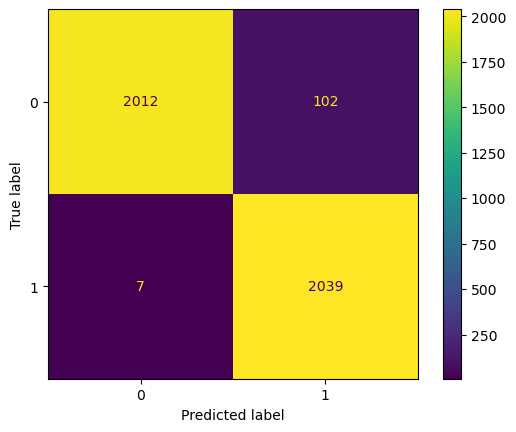

In [32]:
model_LOG_REG=LogisticRegression()
train(model_LOG_REG, 'LogisticRegression')
conf_matrix(model_LOG_REG)

In [33]:
class_report(model_LOG_REG)


              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2114
           1       0.95      1.00      0.97      2046

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [37]:
model_SVC=SVC()
train(model_SVC, 'SVM')


training accuracy of SVM is 0.9996394230769231
testing accuracy of SVM is 0.9853365384615385


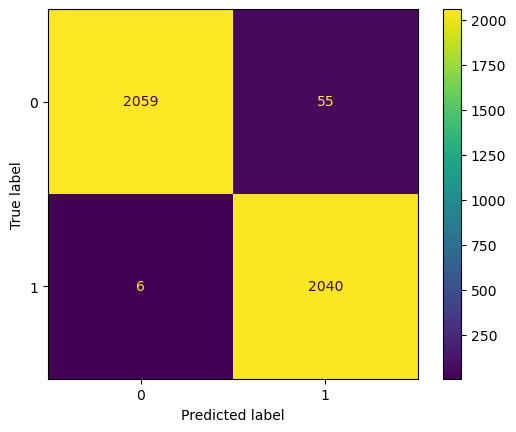

In [38]:
conf_matrix(model_SVC)

In [39]:
class_report(model_SVC)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2114
           1       0.97      1.00      0.99      2046

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [41]:
x1_new=x_test[0]
pred=model_SVC.predict(x1_new)
print(pred)
if (pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake
